In [1]:
import numpy as np

In [2]:
data = np.loadtxt('Datasets/data_mlc2w3_ex1.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

In [3]:
x.shape

(50,)

In [7]:
y.shape

(50,)

In [9]:
x = x.reshape(50,1)

In [10]:
x.shape

(50, 1)

In [11]:
y = y.reshape(50,1)

In [12]:
y.shape

(50, 1)

In [13]:
import matplotlib.pyplot as plt

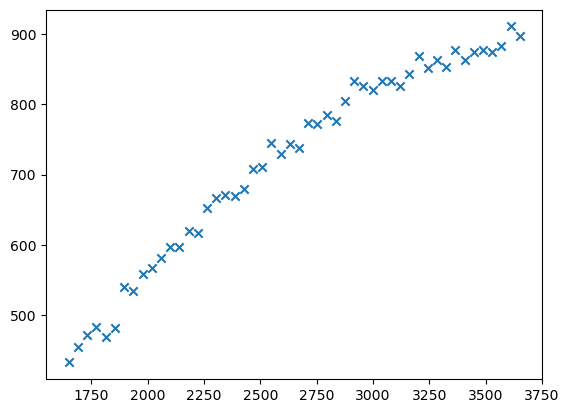

In [17]:
plt.scatter(x,y,marker='x')

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_, y_train, y_ = train_test_split(x,y,test_size=0.4)
x_test, x_cv, y_test, y_cv = train_test_split(x_, y_, test_size=0.5)

In [21]:
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


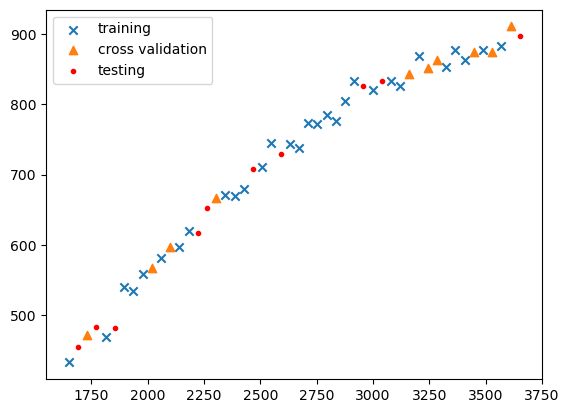

In [26]:
plt.scatter(x_train,y_train, marker='x', label='training')
plt.scatter(x_cv,y_cv, marker='^', label='cross validation')
plt.scatter(x_test,y_test, marker='.', label='testing',c='r')
plt.legend()

In [27]:
from sklearn.preprocessing import StandardScaler
scalar_linear = StandardScaler()
x_train_scaled = scalar_linear.fit_transform(x_train)

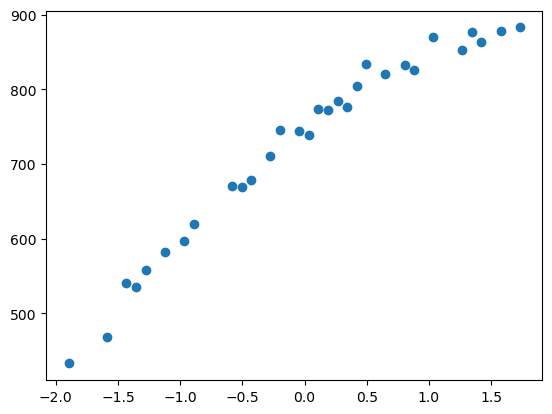

In [34]:
plt.scatter(x_train_scaled,y_train)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [36]:
yhat = lr.predict(x_train_scaled)

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yhat,y_train) 

823.0486418661753

In [41]:
x_cv_scaled = scalar_linear.transform(x_cv)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
x_train_mapped[:5]

array([[3.36528571e+03, 1.13251479e+07],
       [3.48773469e+03, 1.21642933e+07],
       [2.14079592e+03, 4.58300716e+06],
       [2.99793878e+03, 8.98763690e+06],
       [2.87548980e+03, 8.26844157e+06]])

In [46]:
# scaling:
scaler_poly = StandardScaler()
x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
x_train_mapped_scaled[:5]

array([[ 1.34429534,  1.4294387 ],
       [ 1.57562724,  1.72911082],
       [-0.9690236 , -0.97828671],
       [ 0.65029966,  0.59467643],
       [ 0.41896777,  0.33784037]])

In [47]:
# Training MSE:
model = LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yhat = model.predict(x_train_mapped_scaled)
print(f'Training MSE= {mean_squared_error(yhat,y_train)}')

Training MSE= 135.30841191031735


In [50]:
# CV MSE:
x_cv_mapped = poly.transform(x_cv)
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)
yhat = model.predict(x_cv_mapped_scaled)
print(f'Cross Validation MSE= {mean_squared_error(yhat,y_cv)}')

Cross Validation MSE= 92.75744583085796


In [63]:
MSE_CV = np.zeros(10)
MSE_training = np.zeros(10)

model = LinearRegression()
poly_scaler = StandardScaler()

for i in range(1,11):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    x_train_mapped_scaled = poly_scaler.fit_transform(x_train_mapped)
    model.fit(x_train_mapped_scaled,y_train)
    yhat = model.predict(x_train_mapped_scaled)
    MSE_training[i-1] = mean_squared_error(yhat,y_train) 
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = poly_scaler.transform(x_cv_mapped)
    yhat= model.predict(x_cv_mapped_scaled)
    MSE_CV[i-1] = mean_squared_error(yhat,y_cv)

In [66]:
MSE_training.argmin()

9

In [68]:
MSE_CV

array([845.1273143 ,  92.75744583, 124.89839959, 131.52185758,
       103.92046547,  77.49080725, 159.60866776, 140.63001915,
       415.07006549, 435.58474591])

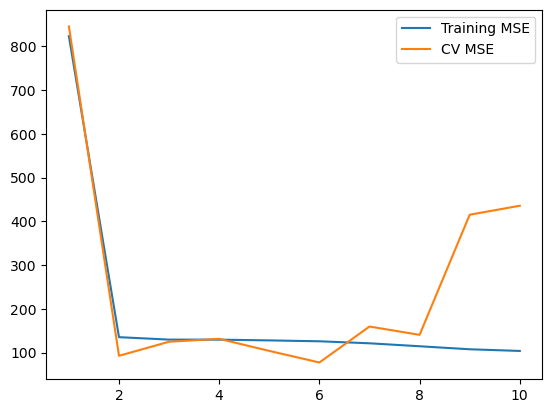

In [76]:
plt.plot(np.linspace(1,10,10),MSE_training,label='Training MSE')
plt.plot(np.linspace(1,10,10),MSE_CV,label='CV MSE')
plt.legend()

In [79]:
MSE_CV.argmin() + 1 # counting starts from zero, hence the +1

6